# Introdução
O modelo vai ser criado para sugerir um preço justo de carros que chegam até a concessionária, com nas características do mesmo. Esse é um problema de regressão porque queremos prever um valor numérico <strong>(preco)</strong>

Bibliotecas usadas:
- pandas → manipulação de tabelas (como se fosse Excel dentro do Python).
- numpy → cálculos matemáticos.
- matplotlib/seaborn → visualização de dados (gráficos).
- scikit-learn → biblioteca de Machine Learning que já tem modelos prontos (inclui regressão linear).

In [53]:
# Importando bibliotecas

# Manipulações de dados
import pandas as pd
import numpy as np 

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns 

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
df = pd.read_csv('../data/carros.csv')
df.head()

,id_carro,marca,modelo,ano,cor,preco,fornecedor,condicao,quilometragem
0,1,Toyota,Hilux,2022,Preto,120901,MegaMotors,novo,0
1,2,Honda,Fit,2024,Branco,122996,VeículoPlus,usado,82654
2,3,Nissan,Sentra,2025,Vermelho,88307,DriveMax,usado,77334
3,4,Toyota,Corolla,2020,Verde,97047,DriveMax,usado,83502
4,5,Volkswagen,Polo,2022,Vermelho,72909,MegaMotors,usado,101382


In [55]:
# Explorando os dados
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_carro       1000 non-null   int64 
 1   marca          1000 non-null   object
 2   modelo         1000 non-null   object
 3   ano            1000 non-null   int64 
 4   cor            1000 non-null   object
 5   preco          1000 non-null   int64 
 6   fornecedor     1000 non-null   object
 7   condicao       1000 non-null   object
 8   quilometragem  1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB
None
          id_carro          ano          preco  quilometragem
count  1000.000000  1000.000000    1000.000000    1000.000000
mean    500.500000  2022.569000   94284.708000   34972.712000
std     288.819436     1.700627   31895.925215   38594.527305
min       1.000000  2020.000000   40133.000000       0.000000
25%     250.750000  2021.000000   67120.000000       0.0

In [56]:
# Vamos avaliar somente modelo, ano, km e condicao
df = df.drop(columns=["fornecedor", "cor", "marca"],axis= 1)


In [57]:
df

,id_carro,modelo,ano,preco,condicao,quilometragem
0,1,Hilux,2022,120901,novo,0
1,2,Fit,2024,122996,usado,82654
2,3,Sentra,2025,88307,usado,77334
3,4,Corolla,2020,97047,usado,83502
4,5,Polo,2022,72909,usado,101382
...,...,...,...,...,...,...
995,996,T-Cross,2025,56595,usado,79109
996,997,Prisma,2021,104237,usado,101539
997,998,Tucson,2020,94224,usado,64407
998,999,Tracker,2021,54885,novo,0


Nosso modelo só entende números. Então precisamos converter colunas como marca, modelo, condicao em números (one-hot encoding).

In [58]:
df = pd.get_dummies(df, columns=["modelo", "condicao"], drop_first=True)


In [59]:
df

,id_carro,ano,preco,quilometragem,modelo_Corolla,modelo_Creta,modelo_EcoSport,modelo_Fiesta,modelo_Fit,modelo_Gol,...,modelo_Onix,modelo_Polo,modelo_Prisma,modelo_Sentra,modelo_T-Cross,modelo_Tracker,modelo_Tucson,modelo_Versa,modelo_Yaris,condicao_usado
0,1,2022,120901,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2024,122996,82654,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,3,2025,88307,77334,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,4,2020,97047,83502,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,2022,72909,101382,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2025,56595,79109,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
996,997,2021,104237,101539,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
997,998,2020,94224,64407,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
998,999,2021,54885,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


Agora vou separar as variáveis
- X (variáveis independentes -> O que influencia o preço)
- Y (variáveis dependentes -> O preço)

In [60]:
x = df.drop("preco", axis = 1)
y = df ['preco']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Usamos 80% dos dados para treino e 20 para teste

In [62]:
# Criando o modelo 
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [63]:
# Fazendo previsoes
y_pred = modelo.predict(x_test)

### Avaliando o modelo
. MSE (mean squared Error ) -> Erro médio
. R2 (coeficiente de determinação) -> quanto o modelo explica da variação do preço (quanto mais próximo de 1 melhor.)

In [64]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 900598741.1302608
R²: -0.03573235087136872


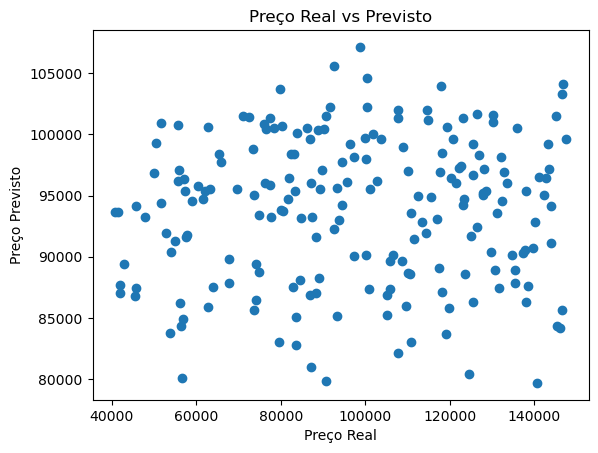

In [65]:
plt.scatter(y_test, y_pred)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Preço Real vs Previsto")
plt.show()


In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Supondo df já com get_dummies ---
x = df.drop("preco", axis=1)
y = df["preco"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(x_train, y_train)

# --- Novo carro ---
carro_novo = pd.DataFrame({
    "ano": [2024],
    "quilometragem": [0],
    "modelo": ["Corolla"],
    "condicao": ["novo"]
})

# Criar dummies
carro_novo_dummies = pd.get_dummies(carro_novo, columns=["modelo", "condicao"], drop_first=True)

# Garantir todas as colunas do treino
for col in x_train.columns:
    if col not in carro_novo_dummies.columns:
        carro_novo_dummies[col] = 0

# Ordenar colunas exatamente como no treino
carro_novo_dummies = carro_novo_dummies[x_train.columns]

# Previsão
preco_previsto = modelo.predict(carro_novo_dummies)
print("Preço previsto:", round(preco_previsto[0],2))


Preço previsto: 99391.33


# Conclusão
🔎 Principais resultados

O MSE obtido foi muito alto, indicando grandes diferenças entre preços previstos e reais. <br>

O R² foi negativo, o que significa que o modelo teve desempenho pior do que simplesmente prever a média de todos os preços.<br>

O gráfico de Preço Real vs Preço Previsto mostrou que as previsões ficaram concentradas em um intervalo limitado, sem acompanhar as variações reais dos preços <br>


⚠️ Limitação dos dados

É importante destacar que os dados utilizados foram gerados artificialmente com a biblioteca faker, o que cria informações com aparência de reais, mas sem relações lógicas consistentes entre as variáveis.
Exemplo: carros mais antigos podem ter preços mais altos que carros novos, ou veículos com alta quilometragem ainda podem apresentar valores elevados. Isso quebra padrões que existem no mercado real.